In [182]:
import os
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
import pathlib

In [183]:
def construct_acc_scores(acc_d, assigned_edges=[]):
    results = {}
    for edge in range(len(assigned_edges),6): #start from first unassigned edge
        for opidx in range(5):
            for k,v in acc_d.items():
                
                #get all accuracies only for preassigned edges
                this_point = True
                for ee,oo in enumerate(assigned_edges):
                    if k[ee]!=oo:
                        this_point = False
                        break
                        
                #get all accuracies for current edge
                if k[edge] == opidx and this_point: 
                    if (edge,opidx) not in results:
                        results[(edge,opidx)] = []
                    results[(edge,opidx)].extend(v)
                    
    acc_scores = []       
    #for k,v in results.items():
    #    print(f'edge = {k[0]} op = {k[1]} best_accuracy = {round(max(v),2)}%')
    for edge in range(len(assigned_edges),6):
        curr_scores = []
        for opidx in range(5):
            v = results[(edge,opidx)]
            curr_scores.append(max(v))
        acc_scores.append(curr_scores)
    return acc_scores


In [214]:
import pickle
PRIMITIVES = [
    'maxpool3x3',
    'conv3x3-bn-relu',
    'conv1x1-bn-relu'
]
search_space_1_pd = pd.read_pickle("search_space1.pkl")
search_space_1_pd.describe()

,val1,val2,val3,mean_val,best_val,test1,test2,test3,mean_test,best_test
count,2487.000000,2487.000000,2487.000000,2487.000000,2487.000000,2487.000000,2487.000000,2487.000000,2487.000000,2487.000000
mean,0.089374,0.090159,0.089136,0.089556,0.081957,0.094981,0.095633,0.094636,0.095083,0.087549
std,0.066913,0.069125,0.064447,0.050274,0.024891,0.065922,0.068191,0.063495,0.049521,0.024308
min,0.050481,0.050581,0.049780,0.052818,0.049780,0.056390,0.054487,0.056190,0.057993,0.054487
25%,0.066006,0.066406,0.065755,0.066072,0.064002,0.071915,0.071815,0.071214,0.071548,0.069111
50%,0.078626,0.078926,0.078626,0.079227,0.075821,0.084836,0.085036,0.085437,0.085303,0.082532
75%,0.097005,0.097857,0.097356,0.097222,0.093399,0.102764,0.103516,0.103516,0.102815,0.099359
max,0.904948,0.904948,0.905549,0.661792,0.259716,0.899940,0.899940,0.900140,0.658420,0.268930


In [215]:
def parse_zc(l):
    zcs = []
    l = l.replace("op_scores", "")
    ls = l.split()
    print(ls)
    for ll in ls[2:]:
        print(ll)
        v = float(ll.strip('[,]'))
        zcs.append(v)
    return zcs

In [216]:
d = 'log/'

seeds_zc = []
for fname in ['zc_pt_0.txt','zc_pt_1.txt','zc_pt_2.txt','zc_pt_3.txt']:
    f = os.path.join(d,fname)
    res_zcpt = [[]]
    curr_edge = 0
    curr_iter = 0
    for l in open(f,'r'):
        if '[' in l and 'op_scores' in l:
            print(l, end='')
            sc = parse_zc(l)
            #print(sc)
            print(curr_iter,curr_edge)
            res_zcpt[curr_iter].append(sc)
            curr_edge += 1
            if curr_edge == 4-curr_iter:
                curr_iter += 1
                curr_edge = 0# curr_iter
                if curr_iter == 4:
                    break
                res_zcpt.append([])
    seeds_zc.append(res_zcpt)
print(seeds_zc)

2022-05-24 12:16:03,701 op_scores[1561.4569, 1546.0674, 1547.1298]
['2022-05-24', '12:16:03,701', '[1561.4569,', '1546.0674,', '1547.1298]']
[1561.4569,
1546.0674,
1547.1298]
0 0
2022-05-24 12:16:04,111 op_scores[1562.0038, 1544.4683, 1546.4888]
['2022-05-24', '12:16:04,111', '[1562.0038,', '1544.4683,', '1546.4888]']
[1562.0038,
1544.4683,
1546.4888]
0 1
2022-05-24 12:16:04,440 op_scores[1551.394, 1544.5708, 1544.3315]
['2022-05-24', '12:16:04,440', '[1551.394,', '1544.5708,', '1544.3315]']
[1551.394,
1544.5708,
1544.3315]
0 2
2022-05-24 12:16:04,769 op_scores[1548.8942, 1544.1017, 1543.9102]
['2022-05-24', '12:16:04,769', '[1548.8942,', '1544.1017,', '1543.9102]']
[1548.8942,
1544.1017,
1543.9102]
0 3
2022-05-24 12:16:05,176 op_scores[1576.5923, 1564.2748, 1564.6736]
['2022-05-24', '12:16:05,176', '[1576.5923,', '1564.2748,', '1564.6736]']
[1576.5923,
1564.2748,
1564.6736]
1 0
2022-05-24 12:16:05,505 op_scores[1570.2925, 1562.6427, 1562.0981]
['2022-05-24', '12:16:05,505', '[1570.292

In [217]:

seeds_disc = []
for fname in ['disc_zc_0.txt','disc_zc_1.txt','disc_zc_2.txt','disc_zc_3.txt']:
    f = os.path.join(d,fname)
    res_zcdisc = [[]]
    curr_edge = 0
    curr_iter = 0
    for l in open(f,'r'):
        if '[' in l and 'op_scores' in l:
            print(l, end='')
            sc = parse_zc(l)
            print(sc)
            print(curr_iter,curr_edge)
            res_zcdisc[curr_iter].append(sc)
            curr_edge += 1
            if curr_edge == 4-curr_iter:
                curr_iter += 1
                curr_edge = 0# curr_iter
                if curr_iter == 4:
                    break
                res_zcdisc.append([])
    seeds_disc.append(res_zcdisc)
print(seeds_disc)

2022-05-24 12:35:34,789 op_scores[1537.1262, 1560.6964, 1557.6204]
['2022-05-24', '12:35:34,789', '[1537.1262,', '1560.6964,', '1557.6204]']
[1537.1262,
1560.6964,
1557.6204]
[1537.1262, 1560.6964, 1557.6204]
0 0
2022-05-24 12:35:35,260 op_scores[1533.1311, 1562.5525, 1557.1984]
['2022-05-24', '12:35:35,260', '[1533.1311,', '1562.5525,', '1557.1984]']
[1533.1311,
1562.5525,
1557.1984]
[1533.1311, 1562.5525, 1557.1984]
0 1
2022-05-24 12:35:35,720 op_scores[1532.6306, 1549.446, 1550.047]
['2022-05-24', '12:35:35,720', '[1532.6306,', '1549.446,', '1550.047]']
[1532.6306,
1549.446,
1550.047]
[1532.6306, 1549.446, 1550.047]
0 2
2022-05-24 12:35:36,054 op_scores[1537.1198, 1547.1033, 1547.7461]
['2022-05-24', '12:35:36,054', '[1537.1198,', '1547.1033,', '1547.7461]']
[1537.1198,
1547.1033,
1547.7461]
[1537.1198, 1547.1033, 1547.7461]
0 3
2022-05-24 12:35:36,466 op_scores[1551.5708, 1577.2936, 1572.3173]
['2022-05-24', '12:35:36,466', '[1551.5708,', '1577.2936,', '1572.3173]']
[1551.5708,
157

In [218]:
op_strength = [
{'zc-pt':[-1561.2969, -1545.901, -1547.141], 'disc-zc':[1537.1261, 1560.6963, 1557.6202]},
{'zc-pt':[-1563.5586, -1545.6113, -1547.6064], 'disc-zc':[1533.1307, 1562.5522, 1557.1984]},
{'zc-pt':[-1551.4971, -1544.5808, -1544.4414], 'disc-zc':[1532.6304, 1549.446, 1550.0469]},
{'zc-pt':[-1548.7837, -1543.9828, -1543.8558], 'disc-zc':[1537.1195, 1547.1031, 1547.7458]},
]

# op_strength = [
# {'zc-pt':[-1561.4567, -1546.0673, -1547.1295]},
# {'zc-pt':[-1562.0037, -1544.4679, -1546.4885]},
# {'zc-pt':[-1551.3938, -1544.5706, -1544.3312]},
# {'zc-pt':[-1548.894, -1544.1014, -1543.91]},
# ]

mean_acc = []
for n in ['node1', 'node2','node3', 'node4']:
    acc_list = []
    for op in PRIMITIVES:
        acc_list.append(1-search_space_1_pd[search_space_1_pd[n] == op]['mean_test'].mean())
    mean_acc.append(acc_list)
    
index = 0
for row in op_strength:
    row['avg_test'] = mean_acc[index]
    index+=1

max_acc = []
for n in ['node1', 'node2','node3', 'node4']:
    acc_list = []
    for op in PRIMITIVES:
        acc_list.append(1-search_space_1_pd[search_space_1_pd[n] == op]['best_test'].min())
    max_acc.append(acc_list)

index = 0
for row in op_strength:
    row['best_test'] = max_acc[index]
    index+=1
    
mean_acc = []
for n in ['node1', 'node2','node3', 'node4']:
    acc_list = []
    for op in PRIMITIVES:
        acc_list.append(1-search_space_1_pd[search_space_1_pd[n] == op]['mean_val'].mean())
    mean_acc.append(acc_list)
    
index = 0
for row in op_strength:
    row['avg_val'] = mean_acc[index]
    index+=1

max_acc = []
for n in ['node1', 'node2','node3', 'node4']:
    acc_list = []
    for op in PRIMITIVES:
        acc_list.append(1-search_space_1_pd[search_space_1_pd[n] == op]['best_val'].min())
    max_acc.append(acc_list)

index = 0
for row in op_strength:
    row['best_val'] = max_acc[index]
    index+=1

model_list = pickle.load(open('../../experiments/darts/search_space_1/search-baseline-20211117-081908-0-1/one_shot_architecture_49.obj', 'rb'))
alphas_mixed_op = model_list[0]


index = 0
for row in op_strength:
    row['darts'] = alphas_mixed_op[index]
    index+=1

model_list = pickle.load(open('../../experiments/gdas/search_space_1/search-baseline-20211118-073146-0-0.025-1/one_shot_architecture_49.obj', 'rb'))
alphas_mixed_op = model_list[0]

index = 0
for row in op_strength:
    row['gdas'] = alphas_mixed_op[index]
    index+=1
print(op_strength)

index=0
best_zc = [[1957.577866864596, 1957.6342043953766, 1936.137360378737], [1957.6342043953766, 1957.577866864596, 1938.3248621308128], [1957.577866864596, 1957.6342043953766, 1935.2843817695896], [1957.146365482576, 1957.6342043953766, 1930.7339235371005]]
for row in op_strength:
    row['best_zc'] = best_zc[index]
    index+=1

[{'zc-pt': [-1561.2969, -1545.901, -1547.141], 'disc-zc': [1537.1261, 1560.6963, 1557.6202], 'avg_test': [0.9011424712755856, 0.9149180704665606, 0.8986900556498519], 'best_test': [0.9438101053237915, 0.9455128312110901, 0.942307710647583], 'avg_val': [0.9067561177631962, 0.9205398117029192, 0.9040353591746723], 'best_val': [0.9502203464508057, 0.9494190812110901, 0.9479166865348816], 'darts': array([-0.15533198,  0.42218527, -0.3585119 ], dtype=float32), 'gdas': array([-0.60156214,  0.7249965 , -0.21059866], dtype=float32)}, {'zc-pt': [-1563.5586, -1545.6113, -1547.6064], 'disc-zc': [1533.1307, 1562.5522, 1557.1984], 'avg_test': [0.8919220879504478, 0.9184344118413754, 0.9045032112114195], 'best_test': [0.9437099099159241, 0.9455128312110901, 0.9439102411270142], 'avg_val': [0.8973344668569997, 0.9242123795423921, 0.9099220574526236], 'best_val': [0.9486178159713745, 0.9502203464508057, 0.9485176205635071], 'darts': array([-0.28444162,  0.47620338, -0.235576  ], dtype=float32), 'gdas'

In [219]:
sq_op_strength = {}
for k in op_strength[0].keys():
    if 'test' not in k:
        continue
    sq_op_strength[k] = []
for e in op_strength:
    for k,v in e.items():
        if 'test' not in k:
            continue
        if 'pt' in k:
            sq_op_strength[k].append([-vv for vv in v])
        else:
            sq_op_strength[k].append(v)

In [220]:
sq_op_strength

{'avg_test': [[0.9011424712755856, 0.9149180704665606, 0.8986900556498519],
  [0.8919220879504478, 0.9184344118413754, 0.9045032112114195],
  [0.887431964173926, 0.9210376585927431, 0.9059962540911366],
  [0.8809928338801976, 0.924195204246284, 0.9085928973889796]],
 'best_test': [[0.9438101053237915, 0.9455128312110901, 0.942307710647583],
  [0.9437099099159241, 0.9455128312110901, 0.9439102411270142],
  [0.9417067170143127, 0.9439102411270142, 0.9455128312110901],
  [0.9285857081413269, 0.9455128312110901, 0.9439102411270142]]}

In [221]:
res_bestacc = []
for ite in range(6):
    res_bestacc.append([])
    for i,edges in enumerate(sq_op_strength['best_test']):
        if i >= ite:
            res_bestacc[ite].append(edges)
    

In [222]:
from scipy import stats
correl_seeds = {}
for n,reses in [('zc-pt',seeds_zc),('disc_zc',seeds_disc)]:
    correl_seeds[n] = []
    for k,res in enumerate(reses):
        correl_seeds[n].append([])
        for i,ite in enumerate(res):
            #compute correlation per edge
            to_avg = []
            for j in range(len(ite)):
                cr = stats.spearmanr(ite[j],res_bestacc[i][j]).correlation
                if 'pt' in n:
                    cr = -cr
                #print(n,i,j,cr)
                to_avg.append(cr)
            #print()

            #average over all edges
            avgcr = sum(to_avg)/len(to_avg)
            print(n,i,j,len(to_avg),avgcr)
            correl_seeds[n][k].append(avgcr)
        

zc-pt 0 3 4 0.75
zc-pt 1 2 3 1.0
zc-pt 2 1 2 0.75
zc-pt 3 0 1 1.0
zc-pt 0 3 4 0.375
zc-pt 1 2 3 0.8333333333333334
zc-pt 2 1 2 0.75
zc-pt 3 0 1 0.5
zc-pt 0 3 4 0.5
zc-pt 1 2 3 0.5
zc-pt 2 1 2 0.5
zc-pt 3 0 1 1.0
zc-pt 0 3 4 0.625
zc-pt 1 2 3 0.8333333333333334
zc-pt 2 1 2 0.75
zc-pt 3 0 1 0.5
disc_zc 0 3 4 0.75
disc_zc 1 2 3 0.8333333333333334
disc_zc 2 1 2 0.5
disc_zc 3 0 1 0.5
disc_zc 0 3 4 0.375
disc_zc 1 2 3 0.8333333333333334
disc_zc 2 1 2 0.5
disc_zc 3 0 1 0.5
disc_zc 0 3 4 0.5
disc_zc 1 2 3 0.5
disc_zc 2 1 2 0.75
disc_zc 3 0 1 1.0
disc_zc 0 3 4 0.625
disc_zc 1 2 3 0.8333333333333334
disc_zc 2 1 2 0.75
disc_zc 3 0 1 1.0


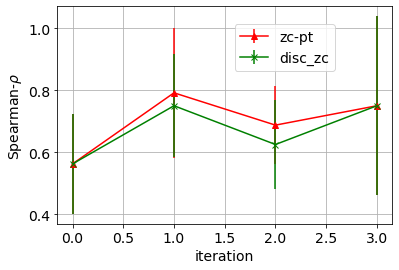

In [225]:
import matplotlib.pyplot as plt
import random
import statistics as stat
import itertools
marker = itertools.cycle(('^', 'x', 'o', 's')) 
color = itertools.cycle(('r', 'g', 'b', 'c')) 

x = np.array([0, 1, 2, 3])
for k,v in correl_seeds.items():
    mline = [] 
    err = []
    for i in range(len(v[0])):
        mline.append(stat.mean([x[i] for x in v]))
        if len(v) == 1:
            err.append(0)
        else:
            err.append(stat.stdev([x[i] for x in v]))
    #print(v)
    #print(mline)
    plt.errorbar(x, mline, err, marker=next(marker),label=k, color=next(color))
    #plt.plot(v,label=k, color=color)
plt.xlabel('iteration')
plt.ylabel('Spearman-$\\rho$')
plt.legend(bbox_to_anchor=(0.85, 0.95))
plt.grid()
plt.savefig(pathlib.Path('op_correl_time_space1').with_suffix('.pdf'), bbox_inches='tight')
plt.show()

In [226]:
import pickle
PRIMITIVES = [
    'maxpool3x3',
    'conv3x3-bn-relu',
    'conv1x1-bn-relu'
]
search_space_2_pd = pd.read_pickle("search_space2.pkl")
search_space_2_pd.describe()

,val1,val2,val3,mean_val,best_val,test1,test2,test3,mean_test,best_test
count,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000
mean,0.094783,0.095845,0.094992,0.095207,0.087212,0.100490,0.101584,0.100708,0.100927,0.093014
std,0.074771,0.079459,0.074839,0.063640,0.044008,0.073683,0.078257,0.073734,0.062684,0.043213
min,0.053786,0.051583,0.053085,0.054821,0.051583,0.057792,0.059395,0.058794,0.060931,0.057792
25%,0.070413,0.070413,0.070613,0.070780,0.067608,0.076723,0.076823,0.076823,0.076990,0.074018
50%,0.082031,0.082632,0.082232,0.082332,0.079026,0.088341,0.088942,0.088542,0.088575,0.085136
75%,0.102464,0.102564,0.102364,0.102464,0.098558,0.107772,0.107873,0.107873,0.108173,0.103866
max,0.905148,0.904948,0.905048,0.904948,0.904948,0.900441,0.899940,0.900040,0.899940,0.899940


In [227]:
d = 'log/'

seeds_zc = []
for fname in ['zc_pt_0_2.txt','zc_pt_1_2.txt','zc_pt_2_2.txt','zc_pt_3_2.txt']:
    f = os.path.join(d,fname)
    res_zcpt = [[]]
    curr_edge = 0
    curr_iter = 0
    for l in open(f,'r'):
        if '[' in l and 'op_scores' in l:
            print(l, end='')
            sc = parse_zc(l)
            #print(sc)
            print(curr_iter,curr_edge)
            res_zcpt[curr_iter].append(sc)
            curr_edge += 1
            if curr_edge == 4-curr_iter:
                curr_iter += 1
                curr_edge = 0# curr_iter
                if curr_iter == 4:
                    break
                res_zcpt.append([])
    seeds_zc.append(res_zcpt)
print(seeds_zc)

2022-05-24 12:23:04,363 op_scores[1572.3877, 1558.1185, 1558.9314]
['2022-05-24', '12:23:04,363', '[1572.3877,', '1558.1185,', '1558.9314]']
[1572.3877,
1558.1185,
1558.9314]
0 0
2022-05-24 12:23:04,695 op_scores[1565.0316, 1555.3308, 1556.2285]
['2022-05-24', '12:23:04,695', '[1565.0316,', '1555.3308,', '1556.2285]']
[1565.0316,
1555.3308,
1556.2285]
0 1
2022-05-24 12:23:05,026 op_scores[1562.3778, 1556.096, 1555.7017]
['2022-05-24', '12:23:05,026', '[1562.3778,', '1556.096,', '1555.7017]']
[1562.3778,
1556.096,
1555.7017]
0 2
2022-05-24 12:23:05,443 op_scores[1559.4006, 1555.2742, 1555.2155]
['2022-05-24', '12:23:05,443', '[1559.4006,', '1555.2742,', '1555.2155]']
[1559.4006,
1555.2742,
1555.2155]
0 3
2022-05-24 12:23:05,871 op_scores[1579.5548, 1572.5406, 1572.7474]
['2022-05-24', '12:23:05,871', '[1579.5548,', '1572.5406,', '1572.7474]']
[1579.5548,
1572.5406,
1572.7474]
1 0
2022-05-24 12:23:06,203 op_scores[1580.1791, 1572.7008, 1572.8807]
['2022-05-24', '12:23:06,203', '[1580.179

In [228]:

seeds_disc = []
for fname in ['disc_zc_0_2.txt','disc_zc_1_2.txt','disc_zc_2_2.txt','disc_zc_3_2.txt']:
    f = os.path.join(d,fname)
    res_zcdisc = [[]]
    curr_edge = 0
    curr_iter = 0
    for l in open(f,'r'):
        if '[' in l and 'op_scores' in l:
            print(l, end='')
            sc = parse_zc(l)
            print(sc)
            print(curr_iter,curr_edge)
            res_zcdisc[curr_iter].append(sc)
            curr_edge += 1
            if curr_edge == 4-curr_iter:
                curr_iter += 1
                curr_edge = 0# curr_iter
                if curr_iter == 4:
                    break
                res_zcdisc.append([])
    seeds_disc.append(res_zcdisc)
print(seeds_disc)

2022-05-24 12:31:11,577 op_scores[1545.5189, 1571.2908, 1568.2137]
['2022-05-24', '12:31:11,577', '[1545.5189,', '1571.2908,', '1568.2137]']
[1545.5189,
1571.2908,
1568.2137]
[1545.5189, 1571.2908, 1568.2137]
0 0
2022-05-24 12:31:12,120 op_scores[1544.441, 1565.446, 1562.4303]
['2022-05-24', '12:31:12,120', '[1544.441,', '1565.446,', '1562.4303]']
[1544.441,
1565.446,
1562.4303]
[1544.441, 1565.446, 1562.4303]
0 1
2022-05-24 12:31:12,697 op_scores[1543.3568, 1560.0961, 1561.08]
['2022-05-24', '12:31:12,697', '[1543.3568,', '1560.0961,', '1561.08]']
[1543.3568,
1560.0961,
1561.08]
[1543.3568, 1560.0961, 1561.08]
0 2
2022-05-24 12:31:13,167 op_scores[1549.1407, 1557.9967, 1558.5978]
['2022-05-24', '12:31:13,167', '[1549.1407,', '1557.9967,', '1558.5978]']
[1549.1407,
1557.9967,
1558.5978]
[1549.1407, 1557.9967, 1558.5978]
0 3
2022-05-24 12:31:13,579 op_scores[1562.9169, 1579.653, 1577.9574]
['2022-05-24', '12:31:13,579', '[1562.9169,', '1579.653,', '1577.9574]']
[1562.9169,
1579.653,
157

In [229]:
op_strength = [
{'zc-pt':[-1571.082, -1556.7533, -1557.5646],'disc-zc':[1545.5188, 1571.2905, 1568.2137]},
{'zc-pt':[-1563.9012, -1553.9757, -1554.926],'disc-zc':[1544.4409, 1565.4459, 1562.43]},
{'zc-pt':[-1561.0864, -1554.7698, -1554.3923],'disc-zc':[1543.3566, 1560.096, 1561.0798]},
{'zc-pt':[-1558.1128, -1553.9596, -1553.8993],'disc-zc':[1549.1406, 1557.9966, 1558.5977]},
]
mean_acc = []
for n in ['node1', 'node2','node3', 'node4']:
    acc_list = []
    for op in PRIMITIVES:
        acc_list.append(1-search_space_2_pd[search_space_2_pd[n] == op]['mean_test'].mean())
    mean_acc.append(acc_list)
    
index = 0
for row in op_strength:
    row['avg_test'] = mean_acc[index]
    index+=1

max_acc = []
for n in ['node1', 'node2','node3', 'node4']:
    acc_list = []
    for op in PRIMITIVES:
        acc_list.append(1-search_space_2_pd[search_space_2_pd[n] == op]['best_test'].min())
    max_acc.append(acc_list)

index = 0
for row in op_strength:
    row['best_test'] = max_acc[index]
    index+=1
    
mean_acc = []
for n in ['node1', 'node2','node3', 'node4']:
    acc_list = []
    for op in PRIMITIVES:
        acc_list.append(1-search_space_2_pd[search_space_2_pd[n] == op]['mean_val'].mean())
    mean_acc.append(acc_list)
    
index = 0
for row in op_strength:
    row['avg_val'] = mean_acc[index]
    index+=1

max_acc = []
for n in ['node1', 'node2','node3', 'node4']:
    acc_list = []
    for op in PRIMITIVES:
        acc_list.append(1-search_space_2_pd[search_space_2_pd[n] == op]['best_val'].min())
    max_acc.append(acc_list)

index = 0
for row in op_strength:
    row['best_val'] = max_acc[index]
    index+=1

model_list = pickle.load(open('../../experiments/darts/search_space_2/search-baseline-20211117-102058-0-2/one_shot_architecture_49.obj', 'rb'))
alphas_mixed_op = model_list[0]
print(alphas_mixed_op)

index = 0
for row in op_strength:
    row['darts'] = alphas_mixed_op[index]
    index+=1
    
model_list = pickle.load(open('../../experiments/gdas/search_space_2/search-baseline-20211118-073322-0-0.025-2/one_shot_architecture_49.obj', 'rb'))
alphas_mixed_op = model_list[0]

index = 0
for row in op_strength:
    row['gdas'] = alphas_mixed_op[index]
    index+=1
    
best_zc = [[1885.3651803861871, 1885.4258926702205, 1865.6187849878424], [1885.371179699335, 1885.4258926702205, 1867.211469063152], [1885.4258926702205, 1885.320541569764, 1864.8086583289898], [1885.371179699335, 1885.4258926702205, 1863.4337113652825]]
index = 0
for row in op_strength:
    row['best_zc'] = best_zc[index]
    index+=1

[[-0.06837409  0.28621525 -0.2840708 ]
 [-0.11984652  0.2508348  -0.17850986]
 [-0.21762423  0.20400664 -0.0487219 ]
 [ 0.11392259 -0.00911051 -0.06399859]]


In [230]:
sq_op_strength = {}
for k in op_strength[0].keys():
    if 'test' not in k:
        continue
    sq_op_strength[k] = []
for e in op_strength:
    for k,v in e.items():
        if 'test' not in k:
            continue
        if 'pt' in k:
            sq_op_strength[k].append([-vv for vv in v])
        else:
            sq_op_strength[k].append(v)

In [231]:
res_bestacc = []
for ite in range(6):
    res_bestacc.append([])
    for i,edges in enumerate(sq_op_strength['best_test']):
        if i >= ite:
            res_bestacc[ite].append(edges)
    

In [232]:
from scipy import stats
correl_seeds = {}
for n,reses in [('zc-pt',seeds_zc),('disc_zc',seeds_disc)]:
    correl_seeds[n] = []
    for k,res in enumerate(reses):
        correl_seeds[n].append([])
        for i,ite in enumerate(res):
            #compute correlation per edge
            to_avg = []
            for j in range(len(ite)):
                cr = stats.spearmanr(ite[j],res_bestacc[i][j]).correlation
                if 'pt' in n:
                    cr = -cr
                #print(n,i,j,cr)
                to_avg.append(cr)
            #print()

            #average over all edges
            avgcr = sum(to_avg)/len(to_avg)
            print(n,i,j,len(to_avg),avgcr)
            correl_seeds[n][k].append(avgcr)
        

zc-pt 0 3 4 0.375
zc-pt 1 2 3 1.0
zc-pt 2 1 2 0.75
zc-pt 3 0 1 1.0
zc-pt 0 3 4 0.5
zc-pt 1 2 3 0.8333333333333334
zc-pt 2 1 2 1.0
zc-pt 3 0 1 0.5
zc-pt 0 3 4 0.5
zc-pt 1 2 3 0.8333333333333334
zc-pt 2 1 2 1.0
zc-pt 3 0 1 1.0
zc-pt 0 3 4 0.125
zc-pt 1 2 3 0.8333333333333334
zc-pt 2 1 2 0.75
zc-pt 3 0 1 0.5
disc_zc 0 3 4 0.375
disc_zc 1 2 3 0.8333333333333334
disc_zc 2 1 2 0.75
disc_zc 3 0 1 0.5
disc_zc 0 3 4 0.375
disc_zc 1 2 3 0.8333333333333334
disc_zc 2 1 2 0.75
disc_zc 3 0 1 0.5
disc_zc 0 3 4 0.5
disc_zc 1 2 3 0.8333333333333334
disc_zc 2 1 2 1.0
disc_zc 3 0 1 1.0
disc_zc 0 3 4 0.375
disc_zc 1 2 3 1.0
disc_zc 2 1 2 0.75
disc_zc 3 0 1 0.5


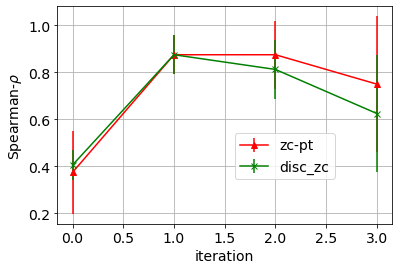

In [233]:
import matplotlib.pyplot as plt
import random
import statistics as stat
import itertools
marker = itertools.cycle(('^', 'x', 'o', 's')) 
color = itertools.cycle(('r', 'g', 'b', 'c')) 

x = np.array([0, 1, 2, 3])
for k,v in correl_seeds.items():
    mline = [] 
    err = []
    for i in range(len(v[0])):
        mline.append(stat.mean([x[i] for x in v]))
        if len(v) == 1:
            err.append(0)
        else:
            err.append(stat.stdev([x[i] for x in v]))
    #print(v)
    #print(mline)
    plt.errorbar(x, mline, err, marker=next(marker),label=k, color=next(color))
    #plt.plot(v,label=k, color=color)
plt.xlabel('iteration')
plt.ylabel('Spearman-$\\rho$')
plt.legend(bbox_to_anchor=(0.85, 0.45))
plt.grid()
plt.savefig(pathlib.Path('op_correl_time_space2').with_suffix('.pdf'), bbox_inches='tight')
plt.show()

In [234]:
import pickle
PRIMITIVES = [
    'maxpool3x3',
    'conv3x3-bn-relu',
    'conv1x1-bn-relu'
]

search_space_3_pd = pd.read_pickle("search_space3.pkl")

search_space_3_pd.describe()

,val1,val2,val3,mean_val,best_val,test1,test2,test3,mean_test,best_test
count,24066.000000,24066.000000,24066.000000,24066.000000,24066.000000,24066.000000,24066.000000,24066.000000,24066.000000,24066.000000
mean,0.101444,0.101974,0.102594,0.102004,0.092163,0.107004,0.107544,0.108198,0.107582,0.097790
std,0.086801,0.088814,0.091723,0.074211,0.051833,0.085724,0.087688,0.090570,0.073342,0.051197
min,0.050581,0.050080,0.051082,0.052618,0.050080,0.056190,0.056090,0.055990,0.058226,0.055990
25%,0.073217,0.073217,0.073217,0.073317,0.070513,0.078851,0.078826,0.078826,0.079026,0.076222
50%,0.087941,0.088341,0.088241,0.088475,0.084836,0.093850,0.094351,0.094050,0.094384,0.090745
75%,0.107272,0.107272,0.107272,0.107338,0.102865,0.112780,0.112881,0.112981,0.112981,0.108674
max,0.905148,0.905148,0.905248,0.905048,0.904948,0.900040,0.900040,0.900240,0.900040,0.899940


In [235]:
d = 'log/'

seeds_zc = []
for fname in ['zc_pt_0_3.txt','zc_pt_1_3.txt','zc_pt_2_3.txt','zc_pt_3_3.txt']:
    f = os.path.join(d,fname)
    res_zcpt = [[]]
    curr_edge = 0
    curr_iter = 0
    for l in open(f,'r'):
        if '[' in l and 'op_scores' in l:
            print(l, end='')
            sc = parse_zc(l)
            #print(sc)
            print(curr_iter,curr_edge)
            res_zcpt[curr_iter].append(sc)
            curr_edge += 1
            if curr_edge == 5-curr_iter:
                curr_iter += 1
                curr_edge = 0# curr_iter
                if curr_iter == 5:
                    break
                res_zcpt.append([])
    seeds_zc.append(res_zcpt)
print(seeds_zc)

2022-05-24 12:23:34,689 op_scores[1607.4208, 1592.5857, 1592.8484]
['2022-05-24', '12:23:34,689', '[1607.4208,', '1592.5857,', '1592.8484]']
[1607.4208,
1592.5857,
1592.8484]
0 0
2022-05-24 12:23:35,108 op_scores[1597.3774, 1590.4839, 1590.8615]
['2022-05-24', '12:23:35,108', '[1597.3774,', '1590.4839,', '1590.8615]']
[1597.3774,
1590.4839,
1590.8615]
0 1
2022-05-24 12:23:35,624 op_scores[1597.0217, 1591.1611, 1590.9554]
['2022-05-24', '12:23:35,624', '[1597.0217,', '1591.1611,', '1590.9554]']
[1597.0217,
1591.1611,
1590.9554]
0 2
2022-05-24 12:23:36,128 op_scores[1592.5948, 1590.4402, 1590.3071]
['2022-05-24', '12:23:36,128', '[1592.5948,', '1590.4402,', '1590.3071]']
[1592.5948,
1590.4402,
1590.3071]
0 3
2022-05-24 12:23:36,562 op_scores[1591.9542, 1589.5205, 1589.8066]
['2022-05-24', '12:23:36,562', '[1591.9542,', '1589.5205,', '1589.8066]']
[1591.9542,
1589.5205,
1589.8066]
0 4
2022-05-24 12:23:37,157 op_scores[1615.2576, 1607.4313, 1607.939]
['2022-05-24', '12:23:37,157', '[1615.2

In [236]:

seeds_disc = []
for fname in ['disc_zc_0_3.txt','disc_zc_1_3.txt','disc_zc_2_3.txt','disc_zc_3_3.txt']:
    f = os.path.join(d,fname)
    res_zcdisc = [[]]
    curr_edge = 0
    curr_iter = 0
    for l in open(f,'r'):
        if '[' in l and 'op_scores' in l:
            print(l, end='')
            sc = parse_zc(l)
            print(sc)
            print(curr_iter,curr_edge)
            res_zcdisc[curr_iter].append(sc)
            curr_edge += 1
            if curr_edge == 5-curr_iter:
                curr_iter += 1
                curr_edge = 0# curr_iter
                if curr_iter == 5:
                    break
                res_zcdisc.append([])
    seeds_disc.append(res_zcdisc)
print(seeds_disc)

2022-05-24 12:29:47,980 op_scores[1572.9888, 1605.9922, 1603.3284]
['2022-05-24', '12:29:47,980', '[1572.9888,', '1605.9922,', '1603.3284]']
[1572.9888,
1605.9922,
1603.3284]
[1572.9888, 1605.9922, 1603.3284]
0 0
2022-05-24 12:29:48,400 op_scores[1578.7545, 1596.7062, 1595.4058]
['2022-05-24', '12:29:48,400', '[1578.7545,', '1596.7062,', '1595.4058]']
[1578.7545,
1596.7062,
1595.4058]
[1578.7545, 1596.7062, 1595.4058]
0 1
2022-05-24 12:29:48,996 op_scores[1579.9987, 1594.7715, 1595.4949]
['2022-05-24', '12:29:48,996', '[1579.9987,', '1594.7715,', '1595.4949]']
[1579.9987,
1594.7715,
1595.4949]
[1579.9987, 1594.7715, 1595.4949]
0 2
2022-05-24 12:29:49,490 op_scores[1585.6465, 1591.4768, 1591.5878]
['2022-05-24', '12:29:49,490', '[1585.6465,', '1591.4768,', '1591.5878]']
[1585.6465,
1591.4768,
1591.5878]
[1585.6465, 1591.4768, 1591.5878]
0 3
2022-05-24 12:29:49,912 op_scores[1584.9796, 1592.0288, 1591.0555]
['2022-05-24', '12:29:49,912', '[1584.9796,', '1592.0288,', '1591.0555]']
[1584.9

In [237]:
op_strength = [
{'zc-pt':[-1607.2521, -1592.4702, -1592.8423],'disc-zc':[1572.9888, 1605.9922, 1603.3281]},
{'zc-pt':[-1594.7885, -1587.9753, -1588.3701],'disc-zc':[1578.7544, 1596.7059, 1595.4058]},
{'zc-pt':[-1595.8427, -1590.0057, -1589.7545],'disc-zc':[1579.9984, 1594.7714, 1595.4946]},
{'zc-pt':[-1592.5262, -1590.3983, -1590.2769],'disc-zc':[1585.6464, 1591.4767, 1591.5876]},
{'zc-pt':[-1591.4397, -1589.012, -1589.29],'disc-zc':[1584.9794, 1592.0288, 1591.0554]},
]
mean_acc = []
for n in ['node1', 'node2','node3', 'node4', 'node5']:
    acc_list = []
    for op in PRIMITIVES:
        acc_list.append(1-search_space_3_pd[search_space_3_pd[n] == op]['mean_test'].mean())
    mean_acc.append(acc_list)
    
index = 0
for row in op_strength:
    row['avg_test'] = mean_acc[index]
    index+=1

max_acc = []
for n in ['node1', 'node2','node3', 'node4', 'node5']:
    acc_list = []
    for op in PRIMITIVES:
        acc_list.append(1-search_space_3_pd[search_space_3_pd[n] == op]['best_test'].min())
    max_acc.append(acc_list)

index = 0
for row in op_strength:
    row['best_test'] = max_acc[index]
    index+=1
    
mean_acc = []
for n in ['node1', 'node2','node3', 'node4', 'node5']:
    acc_list = []
    for op in PRIMITIVES:
        acc_list.append(1-search_space_3_pd[search_space_3_pd[n] == op]['mean_val'].mean())
    mean_acc.append(acc_list)
    
index = 0
for row in op_strength:
    row['avg_val'] = mean_acc[index]
    index+=1

max_acc = []
for n in ['node1', 'node2','node3', 'node4', 'node5']:
    acc_list = []
    for op in PRIMITIVES:
        acc_list.append(1-search_space_3_pd[search_space_3_pd[n] == op]['best_val'].min())
    max_acc.append(acc_list)

index = 0
for row in op_strength:
    row['best_val'] = max_acc[index]
    index+=1

model_list = pickle.load(open('../../experiments/darts/search_space_3/search-baseline-20211117-102128-0-3/one_shot_architecture_49.obj', 'rb'))
alphas_mixed_op = model_list[0]
print(alphas_mixed_op)

index = 0
for row in op_strength:
    row['darts'] = alphas_mixed_op[index]
    index+=1
    
model_list = pickle.load(open('../../experiments/gdas/search_space_3/search-baseline-20211118-073355-0-0.025-3/one_shot_architecture_49.obj', 'rb'))
alphas_mixed_op = model_list[0]
print(alphas_mixed_op)

index = 0
for row in op_strength:
    row['gdas'] = alphas_mixed_op[index]
    index+=1

[[-0.10527673  0.3837883  -0.33968076]
 [-0.27247307  0.45539308 -0.3143204 ]
 [-0.21664971  0.18517315 -0.02566187]
 [-0.2824677   0.14025387  0.06650879]
 [-0.12130244 -0.01854234  0.13866161]]
[[-0.6634956   0.8018449  -0.2480915 ]
 [-0.46219984  0.63503075 -0.21257482]
 [-0.30897266  0.4294812  -0.13782288]
 [-0.27533886  0.32593504 -0.0457304 ]
 [-0.25443754  0.29968253 -0.03940192]]


In [238]:
sq_op_strength = {}
for k in op_strength[0].keys():
    if 'test' not in k:
        continue
    sq_op_strength[k] = []
for e in op_strength:
    for k,v in e.items():
        if 'test' not in k:
            continue
        if 'pt' in k:
            sq_op_strength[k].append([-vv for vv in v])
        else:
            sq_op_strength[k].append(v)

In [239]:
res_bestacc = []
for ite in range(6):
    res_bestacc.append([])
    for i,edges in enumerate(sq_op_strength['best_test']):
        if i >= ite:
            res_bestacc[ite].append(edges)
print(res_bestacc)

[[[0.9438101053237915, 0.9440104365348816, 0.9439102411270142], [0.9438101053237915, 0.9439102411270142, 0.9440104365348816], [0.9438101053237915, 0.9440104365348816, 0.9439102411270142], [0.9417067170143127, 0.9440104365348816, 0.9439102411270142], [0.9285857081413269, 0.9439102411270142, 0.9440104365348816]], [[0.9438101053237915, 0.9439102411270142, 0.9440104365348816], [0.9438101053237915, 0.9440104365348816, 0.9439102411270142], [0.9417067170143127, 0.9440104365348816, 0.9439102411270142], [0.9285857081413269, 0.9439102411270142, 0.9440104365348816]], [[0.9438101053237915, 0.9440104365348816, 0.9439102411270142], [0.9417067170143127, 0.9440104365348816, 0.9439102411270142], [0.9285857081413269, 0.9439102411270142, 0.9440104365348816]], [[0.9417067170143127, 0.9440104365348816, 0.9439102411270142], [0.9285857081413269, 0.9439102411270142, 0.9440104365348816]], [[0.9285857081413269, 0.9439102411270142, 0.9440104365348816]], []]


In [240]:
from scipy import stats
correl_seeds = {}
for n,reses in [('zc-pt',seeds_zc),('disc_zc',seeds_disc)]:
    correl_seeds[n] = []
    for k,res in enumerate(reses):
        correl_seeds[n].append([])
        for i,ite in enumerate(res):
            #compute correlation per edge
            to_avg = []
            for j in range(len(ite)):
                cr = stats.spearmanr(ite[j],res_bestacc[i][j]).correlation
                if 'pt' in n:
                    cr = -cr
                #print(n,i,j,cr)
                to_avg.append(cr)
            #print()

            #average over all edges
            avgcr = sum(to_avg)/len(to_avg)
            print(n,i,j,len(to_avg),avgcr)
            correl_seeds[n][k].append(avgcr)
        

zc-pt 0 4 5 0.6
zc-pt 1 3 4 0.875
zc-pt 2 2 3 0.6666666666666666
zc-pt 3 1 2 0.75
zc-pt 4 0 1 0.5
zc-pt 0 4 5 0.7
zc-pt 1 3 4 0.75
zc-pt 2 2 3 0.6666666666666666
zc-pt 3 1 2 0.75
zc-pt 4 0 1 1.0
zc-pt 0 4 5 1.0
zc-pt 1 3 4 0.875
zc-pt 2 2 3 0.8333333333333334
zc-pt 3 1 2 0.75
zc-pt 4 0 1 1.0
zc-pt 0 4 5 0.7
zc-pt 1 3 4 0.75
zc-pt 2 2 3 0.6666666666666666
zc-pt 3 1 2 0.75
zc-pt 4 0 1 0.5
disc_zc 0 4 5 0.6
disc_zc 1 3 4 0.75
disc_zc 2 2 3 0.6666666666666666
disc_zc 3 1 2 0.75
disc_zc 4 0 1 0.5
disc_zc 0 4 5 0.7
disc_zc 1 3 4 0.75
disc_zc 2 2 3 0.6666666666666666
disc_zc 3 1 2 0.75
disc_zc 4 0 1 1.0
disc_zc 0 4 5 1.0
disc_zc 1 3 4 0.875
disc_zc 2 2 3 0.8333333333333334
disc_zc 3 1 2 0.75
disc_zc 4 0 1 1.0
disc_zc 0 4 5 0.7
disc_zc 1 3 4 0.75
disc_zc 2 2 3 0.6666666666666666
disc_zc 3 1 2 0.75
disc_zc 4 0 1 0.5


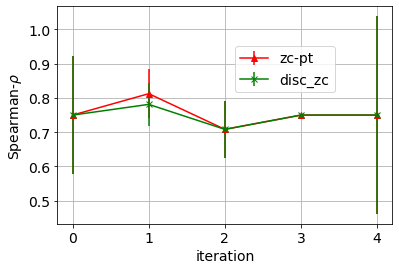

In [241]:
import matplotlib.pyplot as plt
import random
import statistics as stat
import itertools
marker = itertools.cycle(('^', 'x', 'o', 's')) 
color = itertools.cycle(('r', 'g', 'b', 'c')) 
plt.rcParams.update({'font.size': 14})
x = np.array([0, 1, 2, 3,4])
for k,v in correl_seeds.items():
    mline = [] 
    err = []
    for i in range(len(v[0])):
        mline.append(stat.mean([x[i] for x in v]))
        if len(v) == 1:
            err.append(0)
        else:
            err.append(stat.stdev([x[i] for x in v]))
    #print(v)
    #print(mline)
    plt.errorbar(x, mline, err, marker=next(marker),label=k, color=next(color))
    #plt.plot(v,label=k, color=color)
plt.xlabel('iteration')
plt.ylabel('Spearman-$\\rho$')
plt.legend(bbox_to_anchor=(0.85, 0.85))
plt.grid()
plt.savefig(pathlib.Path('op_correl_time_space3').with_suffix('.pdf'), bbox_inches='tight')
plt.show()